### <font color='red'>1) Import Packages and Load Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option("display.max_rows", 8)
df = pd.read_csv("CR2_Data_Raw.csv", header=0, skiprows=0)
df

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,ita Bose,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,CST_121920,Alper Jonathan,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,CST_109330,Umesh Desai,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,CST_128288,Rie,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45524,CST_136670,Luciana,31,F,N,Y,0.0,383476.74,966.0,Accountants,2.0,1.0,43369.91,139947.16,32,679.0,0,0,0
45525,CST_145435,Jessica,27,F,N,Y,0.0,260052.18,1420.0,Core staff,2.0,0.0,22707.51,83961.83,46,727.0,0,0,0
45526,CST_130913,Tessa,32,M,Y,N,0.0,157363.04,2457.0,Laborers,2.0,0.0,20150.10,25538.72,92,805.0,0,0,0
45527,CST_160078,Gopinath,38,M,N,Y,1.0,316896.28,1210.0,Unknown,3.0,0.0,34603.78,36630.76,26,682.0,0,0,0


* As name and ID of customers will have no value in explaining any characteristics of their behaviour, those columns are excluded from the dataset.

In [3]:
df.drop(columns=["customer_id","name"], inplace=True)

### <font color='red'>2) Overview of the Dataset

In [4]:
print(f"We have {df.shape[0]} rows and {df.shape[1]} columns in our dataset.", end="\n\n")
df.info()

We have 45528 rows and 17 columns in our dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45528 entries, 0 to 45527
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      45528 non-null  int64  
 1   gender                   45528 non-null  object 
 2   owns_car                 44981 non-null  object 
 3   owns_house               45528 non-null  object 
 4   no_of_children           44754 non-null  float64
 5   net_yearly_income        45528 non-null  float64
 6   no_of_days_employed      45065 non-null  float64
 7   occupation_type          45528 non-null  object 
 8   total_family_members     45445 non-null  float64
 9   migrant_worker           45441 non-null  float64
 10  yearly_debt_payments     45433 non-null  float64
 11  credit_limit             45528 non-null  float64
 12  credit_limit_used(%)     45528 non-null  int64  
 13  credit_score             

In [5]:
# numerical columns and their names
df_num = df.select_dtypes(include=["number"])
cols_num = df_num.columns

# categorical columns and their names
df_cat = df.select_dtypes(include=["object"])
cols_cat = df_cat.columns

In [6]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option("display.max_rows", None)
df_num.describe([0.01,0.25,0.5,0.75,0.99])

,age,no_of_children,net_yearly_income,no_of_days_employed,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
count,45528.00,44754.00,45528.00,45065.00,45445.00,45441.00,45433.00,45528.00,45528.00,45520.00,45528.00,45528.00,45528.00
mean,38.99,0.42,200655.62,67609.29,2.16,0.18,31796.97,43548.42,52.24,782.79,0.06,0.05,0.08
std,9.54,0.72,669074.03,139323.52,0.91,0.38,17269.73,148784.69,29.38,100.62,0.26,0.22,0.27
min,23.00,0.00,27170.61,2.00,1.00,0.00,2237.47,4003.14,0.00,500.00,0.00,0.00,0.00
1%,23.00,0.00,53741.72,116.00,1.00,0.00,7161.77,9097.27,1.00,525.00,0.00,0.00,0.00
25%,31.00,0.00,126345.84,936.00,2.00,0.00,19231.14,23973.81,27.00,704.00,0.00,0.00,0.00
50%,39.00,0.00,171714.91,2224.00,2.00,0.00,29081.65,35688.04,54.00,786.00,0.00,0.00,0.00
75%,47.00,1.00,240603.76,5817.00,3.00,0.00,40561.15,53435.76,78.00,867.00,0.00,0.00,0.00
99%,55.00,3.00,577901.51,365252.00,5.00,1.00,84414.07,145102.30,99.00,946.00,1.00,1.00,1.00
max,55.00,9.00,140759012.73,365252.00,10.00,1.00,328112.86,31129970.49,99.00,949.00,2.00,1.00,1.00


In [7]:
df_cat.describe()

,gender,owns_car,owns_house,occupation_type
count,45528,44981,45528,45528
unique,3,2,2,19
top,F,N,Y,Unknown
freq,29957,29743,31642,14299


* Drop the records with full of NA on all attributes, if any

In [8]:
df = df.dropna(how="all")

* Some missing values exist in 7 of the columns with varying numbers, but their ratios are all less than 0.02.

In [9]:
pd.set_option("display.max_rows", None)
df.isnull().sum(axis=0)

age                          0
gender                       0
owns_car                   547
owns_house                   0
no_of_children             774
net_yearly_income            0
no_of_days_employed        463
occupation_type              0
total_family_members        83
migrant_worker              87
yearly_debt_payments        95
credit_limit                 0
credit_limit_used(%)         0
credit_score                 8
prev_defaults                0
default_in_last_6months      0
credit_card_default          0
dtype: int64

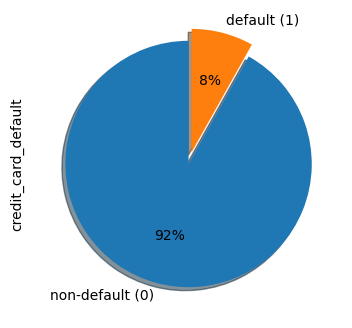

In [12]:
plt.figure(figsize=(10,4))

default_perc = (df["credit_card_default"].value_counts() / len(df["credit_card_default"]) * 100)

default_perc.plot(kind="pie",  legend=False, 
                 autopct='%1.0f%%', explode=(0,0.1), 
                 shadow=True, labels=["non-default (0)","default (1)"],
                 startangle=90, ax=plt.subplot(111))

plt.show()

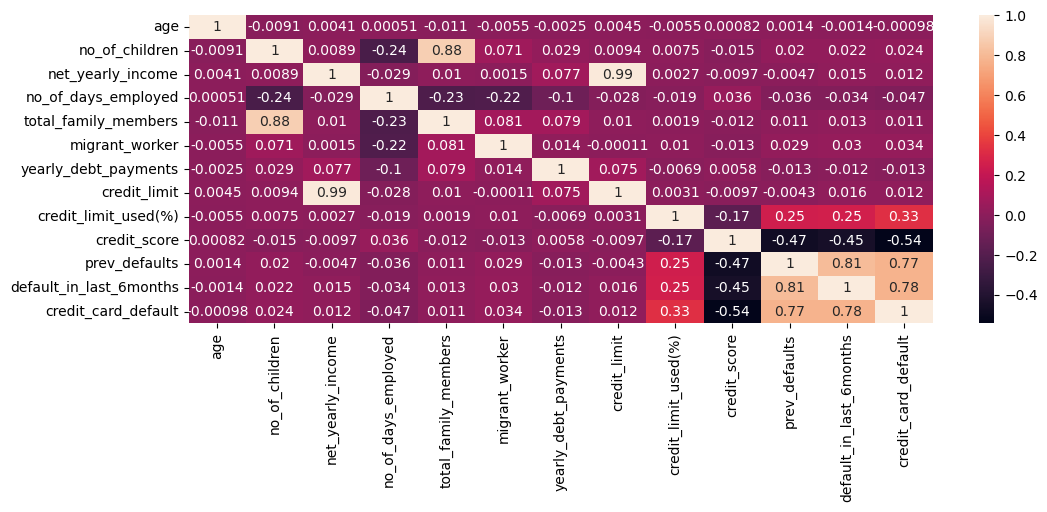

In [11]:
pd.set_option('display.float_format', lambda x: '%.1f' % x)

corr_mat = df.corr()
corr_mat
plt.figure(figsize=(12,4))
sns.heatmap(corr_mat, annot=True)
plt.show()

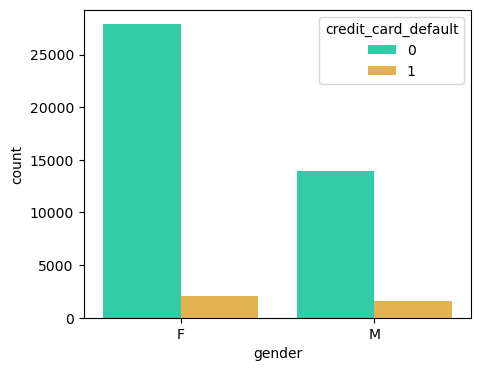

In [33]:
plt.figure(figsize=(5,4))

sns.countplot(data=df, x="gender", hue="credit_card_default", order=["F","M"], hue_order=[0,1],palette="turbo")

plt.show()

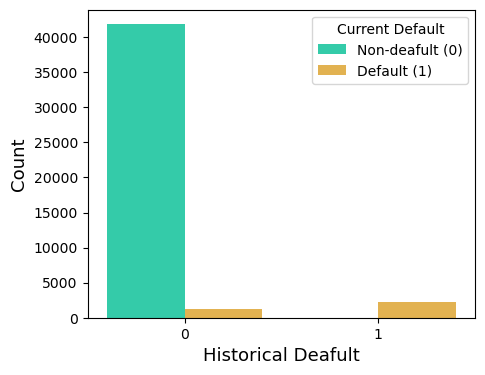

In [48]:
plt.figure(figsize=(5,4))
sns.countplot(data=df, x="prev_defaults", hue="credit_card_default", order=[0, 1], palette="turbo")
plt.xlabel('Historical Deafult',fontsize=13) 
plt.ylabel('Count',fontsize=13) 
plt.legend(title='Current Default', loc='upper right', labels=['Non-deafult (0)', 'Default (1)'])
plt.show()

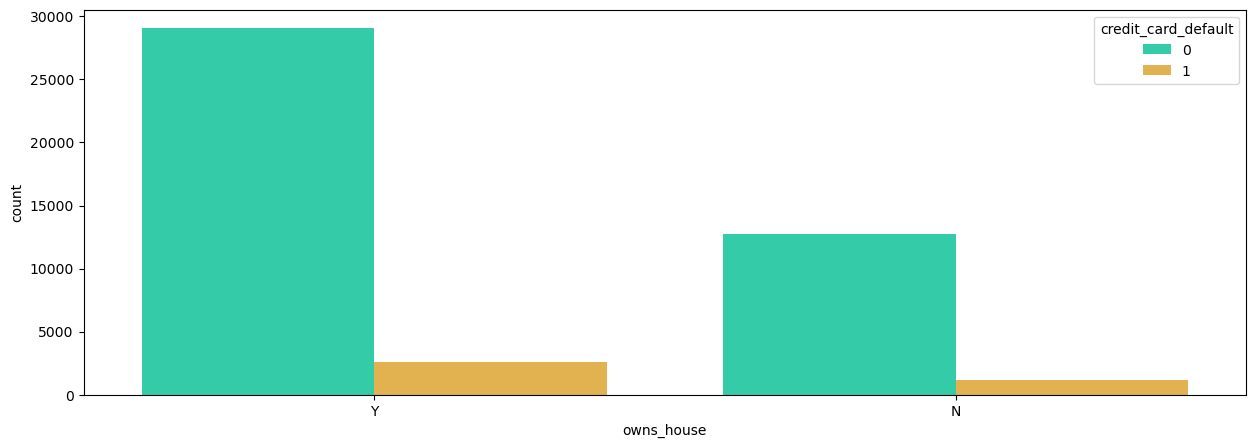

In [15]:
plt.figure(figsize=(15,5))

sns.countplot(data=df, x="owns_house", hue="credit_card_default", palette="turbo")

plt.show()

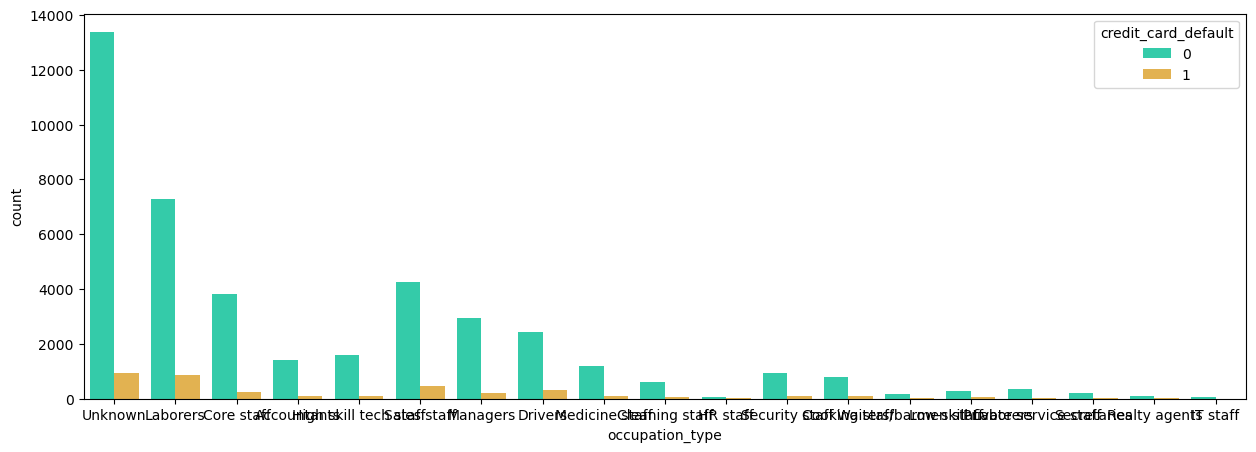

In [16]:
plt.figure(figsize=(15,5))

sns.countplot(data=df, x="occupation_type", hue="credit_card_default", palette="turbo")

plt.show()

In [18]:
from pandas import factorize

labels, categories = factorize(df["occupation_type"])
df["labels"] = labels
abs(df["credit_card_default"].corr(df["labels"]))

0.032322780692384055

In [19]:
labels, categories = factorize(df["owns_house"])
df["labels"] = labels
abs(df["credit_card_default"].corr(df["labels"]))

0.0026928937007516408

In [22]:
labels, categories = factorize(df["owns_car"])
df["labels"] = labels
abs(df["credit_card_default"].corr(df["labels"]))

0.016644838301966912

In [24]:
labels, categories = factorize(df["gender"])
df["labels"] = labels
abs(df["credit_card_default"].corr(df["labels"]))

0.05754416237258165

### <font color='red'>3) Missing Value Imputation

* KNN Imputer does not recognize text data values. Therefore, *one-hot encoding* or creating *dummy variables* should be applied beforehand. LabelEncoder or OrdinalEncoder from Scikit-Learn’s preprocessing package could be helpful in this regard.

In [10]:
df_1 = pd.get_dummies(df)
df_1.head()

,age,no_of_children,net_yearly_income,no_of_days_employed,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,...,occupation_type_Low-skill Laborers,occupation_type_Managers,occupation_type_Medicine staff,occupation_type_Private service staff,occupation_type_Realty agents,occupation_type_Sales staff,occupation_type_Secretaries,occupation_type_Security staff,occupation_type_Unknown,occupation_type_Waiters/barmen staff
0,46,0.0,107934.04,612.0,1.0,1.0,33070.28,18690.93,73,544.0,...,0,0,0,0,0,0,0,0,1,0
1,29,0.0,109862.62,2771.0,2.0,0.0,15329.53,37745.19,52,857.0,...,0,0,0,0,0,0,0,0,0,0
2,37,0.0,230153.17,204.0,2.0,0.0,48416.60,41598.36,43,650.0,...,0,0,0,0,0,0,0,0,0,0
3,39,0.0,122325.82,11941.0,2.0,0.0,22574.36,32627.76,20,754.0,...,0,0,0,0,0,0,0,0,0,0
4,46,0.0,387286.00,1459.0,1.0,0.0,38282.95,52950.64,75,927.0,...,0,0,0,0,0,0,0,0,0,0


* KNN Imptuer is a distance-based imputation method and it requires us to normalize our data. If not, the greater values in magnitude could bias the result of imputation, which should not be the case. If the attributes are scaled on a standard range, they would be treated equally. Sklearn's MinMaxScaler scales the variables in a dataset to the range between 0 and 1.

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_2 = pd.DataFrame(scaler.fit_transform(df_1), columns = df_1.columns)
df_2.head()

,age,no_of_children,net_yearly_income,no_of_days_employed,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,...,occupation_type_Low-skill Laborers,occupation_type_Managers,occupation_type_Medicine staff,occupation_type_Private service staff,occupation_type_Realty agents,occupation_type_Sales staff,occupation_type_Secretaries,occupation_type_Security staff,occupation_type_Unknown,occupation_type_Waiters/barmen staff
0,0.71875,0.0,0.000574,0.001670,0.000000,1.0,0.094615,0.000472,0.737374,0.097996,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.18750,0.0,0.000588,0.007581,0.111111,0.0,0.040175,0.001084,0.525253,0.795100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.43750,0.0,0.001442,0.000553,0.111111,0.0,0.141708,0.001208,0.434343,0.334076,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.50000,0.0,0.000676,0.032687,0.111111,0.0,0.062407,0.000920,0.202020,0.565702,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.71875,0.0,0.002559,0.003989,0.000000,0.0,0.110611,0.001573,0.757576,0.951002,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df_3 = pd.DataFrame(imputer.fit_transform(df_2), columns = df_2.columns)

In [13]:
df_4 = scaler.inverse_transform(df_3)
df_4 = pd.DataFrame(df_4, columns=df_3.columns)
df_4.head()

,age,no_of_children,net_yearly_income,no_of_days_employed,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,...,occupation_type_Low-skill Laborers,occupation_type_Managers,occupation_type_Medicine staff,occupation_type_Private service staff,occupation_type_Realty agents,occupation_type_Sales staff,occupation_type_Secretaries,occupation_type_Security staff,occupation_type_Unknown,occupation_type_Waiters/barmen staff
0,46.0,0.0,107934.04,612.0,1.0,1.0,33070.28,18690.93,73.0,544.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,29.0,0.0,109862.62,2771.0,2.0,0.0,15329.53,37745.19,52.0,857.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,37.0,0.0,230153.17,204.0,2.0,0.0,48416.60,41598.36,43.0,650.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,39.0,0.0,122325.82,11941.0,2.0,0.0,22574.36,32627.76,20.0,754.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,46.0,0.0,387286.00,1459.0,1.0,0.0,38282.95,52950.64,75.0,927.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### <font color='red'>4) Outlier Analysis

All ages are between 23 and 55, which sounds plausible.

In [14]:
df_4.age.describe()

count    45528.000000
mean        38.993411
std          9.543990
min         23.000000
25%         31.000000
50%         39.000000
75%         47.000000
max         55.000000
Name: age, dtype: float64

In [15]:
df_4[df_4["no_of_children"] > df_4["total_family_members"]]

,age,no_of_children,net_yearly_income,no_of_days_employed,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,...,occupation_type_Low-skill Laborers,occupation_type_Managers,occupation_type_Medicine staff,occupation_type_Private service staff,occupation_type_Realty agents,occupation_type_Sales staff,occupation_type_Secretaries,occupation_type_Security staff,occupation_type_Unknown,occupation_type_Waiters/barmen staff
8764,37.0,2.0,346178.31,684.0,1.6,1.0,45270.90,76938.04,99.0,736.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
20288,26.0,1.2,132523.44,1428.0,1.0,0.0,19833.03,24120.01,92.0,626.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
df_4["credit_limit_used(%)"].describe()

count    45528.00000
mean        52.23502
std         29.37691
min          0.00000
25%         27.00000
50%         54.00000
75%         78.00000
max         99.00000
Name: credit_limit_used(%), dtype: float64

All variables' distributions are aligining with the reality and there is no value in any of those which are not possible to occur.

### 5) Save the Final Dataset

In [17]:
df_4.to_csv("CR2_Data_Processed.csv", index=False)